## Statistical Tests:
1. Z-Test  - average
2. T-Test  - average
3. Chi Square test - categorical data
4. Anova test - variance

# When to perform Z-test and T-test
- q1. do we know the std of population
    - yes
        - q2. is sample size > 30
            - yes
                - we will use Z-test
            - no
                - T-test
    - no
        - T-test


# 1. Z-test
    Definition:
        A Z-test is used to determine whether there is a significant difference between sample and population means, or between two sample means, when the population variance is known and the sample size is large (usually n > 30).

## Key Points:
- Requires known population standard deviation (σ).
- Works well for large sample sizes (n > 30) because the sampling distribution of the mean approximates a normal distribution (Central Limit Theorem).
- Uses the Z-distribution (standard normal distribution).

![alt text](Ztest_formula.png)

## Where:
- X bar = sample mean
- μ = population mean
- σ = population standard deviation
- n = sample size

-68.89758380792003


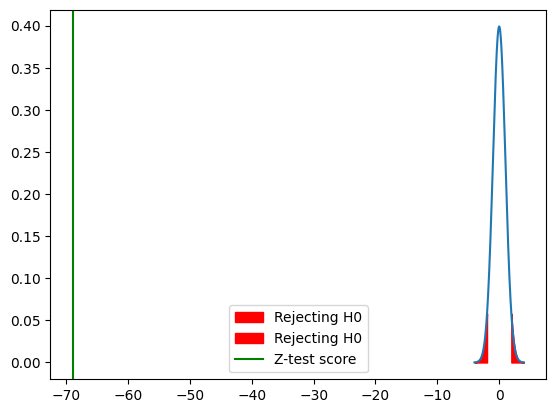

In [1]:
# The average height of all residance in a city is 168cm with a population std σ = 3.9. A doctor believe
# the mean to be defferent he measured the height of 36 individuals and found the average to be 169.5cm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as smt
import seaborn as sns
x_bar = 145
P_mean = 164
p_s = 3.9
n =200

z_test = (x_bar-P_mean)/(p_s/np.sqrt(n))

print(z_test)



x = np.linspace(-4,4, 500)
y = smt.norm.pdf(x, 0,1)
z_crit = smt.norm.ppf(1-0.05/2)
# z_crit


plt.plot(x,y)
plt.fill_between(x,y, where = (x<=-z_crit), color = 'r', label = 'Rejecting H0')
plt.fill_between(x,y, where = (x>=z_crit), color = 'r', label = 'Rejecting H0')


plt.axvline(z_test, color = 'g', label = 'Z-test score')
# print(z_crit)
# print(z_test)
plt.legend()








# 2. T-test
    Definition:
        A T-test is used to determine whether there is a significant difference between sample means when the population variance is unknown and/or the sample size is small (usually n <= 30).
## Key Points:
- Population standard deviation is unknown.
- Uses the sample standard deviation (s) instead.
- Works for small sample sizes because the T-distribution accounts for extra variability.
- Uses the T-distribution, which is similar to the normal distribution but has heavier tails (more variability).

![alt text](Ttest_formula.png)

## Where:
- X bar = sample mean
- μ = population mean
- s = sample standard deviation
- n = sample size

## Degree of freedom
- DoF = n-1


1.3693063937629153
3.6594050194045704


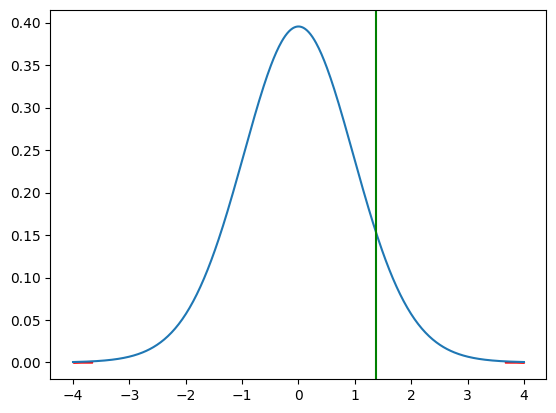

In [19]:
# In the population the average IQ is 100. A team of researchers want to test a new medication to see it has
# either a positive or nagetive effect on inteligance or no effect at all. A sample of 30 participant who has taken 
# the medication has a mean of 140 with a std of 20.

p_mean = 100
s_mean = 105
s_std = 20
n = 30
df = n - 1


t_test = (s_mean - p_mean)/(s_std/np.sqrt(n))
t_crit = smt.t.ppf(1-0.001/2,df)
print(t_test)
print(t_crit)


x = np.linspace(-4,4, 500)
y = smt.t.pdf(x, df)



plt.plot(x,y)
plt.fill_between(x,y, where = (x<= -t_crit), color = "r", label = 'Rejecting H0')
plt.fill_between(x,y, where = (x>= t_crit), color = "r", label = 'Rejecting H0')

plt.axvline(t_test, color = 'g')




| Condition                                          | Test Type                                                 |
| -------------------------------------------------- | --------------------------------------------------------- |
| Population variance known, large sample (n > 30)   | Z-test                                                    |
| Population variance unknown, small sample (n < 30) | T-test                                                    |
| Comparing means of **two independent samples**     | Two-sample T-test (or Z-test if variance known & large n) |


## Practice
1. One-sample Z-test
    - Scenario: A factory claims that its light bulbs last 1000 hours on average. You test a sample of 50 bulbs and find the sample mean is 980 hours, with a known population standard deviation of 50 hours.
    - Question: Is there enough evidence to say the bulbs last less than 1000 hours at a 5% significance level?

In [36]:
s_mean = 980
p_mean = 1000
p_std = 50
n = 50
sl = 0.05


z_test = (s_mean - p_mean)/(p_std / np.sqrt(n))
z_crit = smt.norm.ppf(1-0.05/2)

print(z_test, -z_crit,z_crit)


-2.8284271247461903 -1.959963984540054 1.959963984540054


2. One-sample T-test
    - Scenario:A nutritionist claims that the average sugar content in a brand of cereal is 12g per serving. You randomly sample 10 cereals and get sugar contents:
        - [11, 13, 12, 10, 14, 12, 13, 11, 12, 13]
    - Question: Can we reject the claim that the mean sugar content is 12g? Use a 5% significance level.       t_test = xbar-pm/x_s/sqrt(n)

In [45]:
p_mean = 12
s = [11, 13, 12, 10, 14, 12, 13, 11, 12, 13]
n = len(s)
s_mean = np.mean(s)
s_std = np.std(s)
df = n - 1

# t_test = (s_mean - p_mean)/(s_std/np.sqrt(n))

t_test, t_crit = smt.ttest_1samp(s, p_mean)

# t_crit = smt.t.ppf(1-0.05/2,df)


print(t_test, -t_crit,t_crit)

0.2641352718976862 -0.7976245209721033 0.7976245209721033


3. Two-sample T-test
    - Scenario: Two teaching methods are tested for student performance. The test scores are:
        - Method A: [85, 88, 90, 92, 87]
        - Method B: [78, 82, 85, 80, 79]
    - Question: Do the two methods produce significantly different results at a 5% significance level?

4. Z-test for proportions
    - Scenario: A website claims that 60% of visitors click on ads. You check a sample of 100 visitors, and 55 clicked.
    - Question: Can we reject the claim at a 5% significance level?

# What is the Chi-Square Test?
    The Chi-Square (χ²) test is a statistical hypothesis test used to determine whether there is a significant difference between the observed frequencies (actual data) and the expected frequencies (theoretical or predicted data).
    It’s mainly used for categorical data.
    -> The chi square  test for the goodness of fit that claims about population proportion  {categorical data}

## Types of Chi-Square Tests
1. Chi-Square Goodness-of-Fit Test
    - Checks if a single categorical variable follows a specified distribution.
    - Example: Does the distribution of students’ favorite subjects (Math, Science, English) match the expected proportions?
2. Chi-Square Test of Independence
    - Checks if two categorical variables are independent.
    - Example: Is there a relationship between gender (male/female) and voting preference (party A/party B)?
## Formula for Chi-Square
![](chi_formula.png)

### Where:
- Oi= Observed frequency (actual data)
- 𝐸𝑖= Expected frequency (theoretical data)


## Chi Square Distribution Boundry
![](chi-squared-distribution.png)


## Steps to Perform Chi-Square Test
1. State the null hypothesis (H₀) and alternative hypothesis (H₁).
    - H₀: No significant difference (distribution is as expected / variables are independent).
    - H₁: There is a significant difference.
2. Calculate the expected frequencies.
3. Apply the formula to calculate χ² statistic.
4. Compare χ² with the critical value from the chi-square distribution table (based on degrees of freedom and significance level, usually 0.05).
5. Make a decision:
    - If χ² > critical value → Reject H₀.
    - If χ² ≤ critical value → Fail to reject H₀.

## Example (Goodness-of-Fit)
    Suppose a teacher expects students to equally like Math, Science, English.
    Observed = [30, 50, 20]
    Expected = [33.3, 33.3, 33.3]

![](chi_eg.png)

If the calculated χ² > critical χ² (df=2, α=0.05 → 5.99), we reject H₀.


chi square test: 26.666666666666668, chi_crit: 5.991464547107979


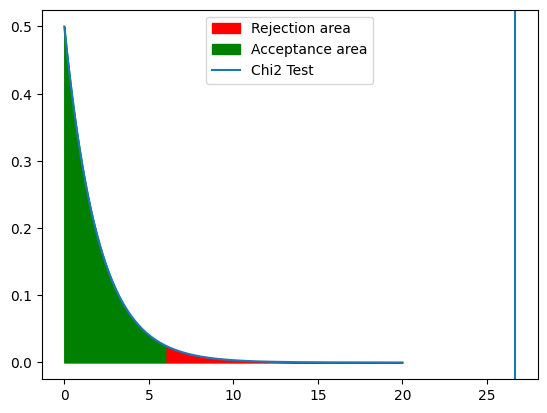

In [2]:
# In 2010 census of the small city where weight of individuals were as folows:
#  <50kg = 20%, 50 - 75 = 30%, >75kg = 50%
# In 2025, weight of 500 individuals where checked and the sample was:
# <50 = 140, 50 - 75 = 160, >75 = 200

n = 500
sl = 0.05
ci = 0.95
ob_values = np.array([140,160,200])
ex_proportion = np.array([0.20,0.30,0.50])
df = len(ex_proportion)-1
ex_values = ex_proportion*n
ch2, p = smt.chisquare(f_obs=ob_values, f_exp=ex_values)
chi_crit = smt.chi2.ppf(1-0.05,df)
print(f"chi square test: {ch2}, chi_crit: {chi_crit}")


x = np.linspace(0,20,500)
y = smt.chi2.pdf(x,df)

plt.fill_between(x, y, where=(x>chi_crit), color = 'r', label = 'Rejection area')
plt.fill_between(x, y, where=(x<chi_crit), color = 'g', label = 'Acceptance area')

plt.axvline(ch2, label = 'Chi2 Test')
plt.legend()
plt.plot(x,y)